How to Create & Understand Mel-Spectrograms


https://importchris.medium.com/how-to-create-understand-mel-spectrograms-ff7634991056

In [5]:
pip install numpy


SyntaxError: invalid syntax (4265594094.py, line 1)

In [1]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
%matplotlib inline
# Matplotlib colors
blue = "#0057b7"
yellow = "#ffd700"
cmap = "winter"
path = './Data/rockHotel65/'
#song = 'RockHotel_65_22050_mono_30.wav'
song = 'RockHotel_65_Spidola_20sec.wav'
audio = path + song
signal, sr = librosa.load(audio)
ipd.Audio(signal, rate=sr)

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

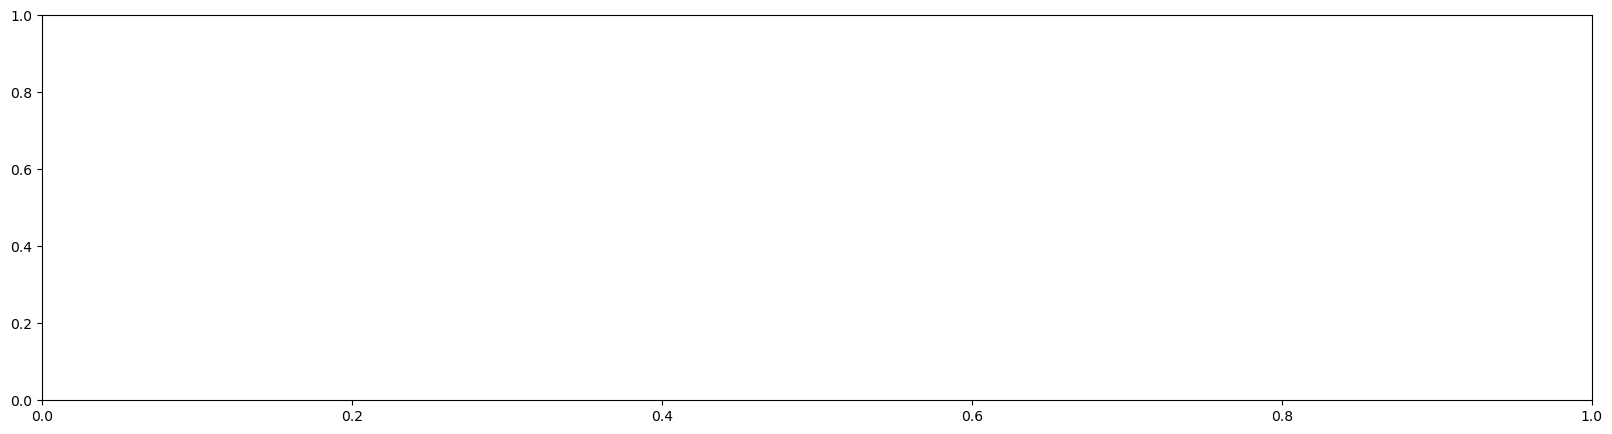

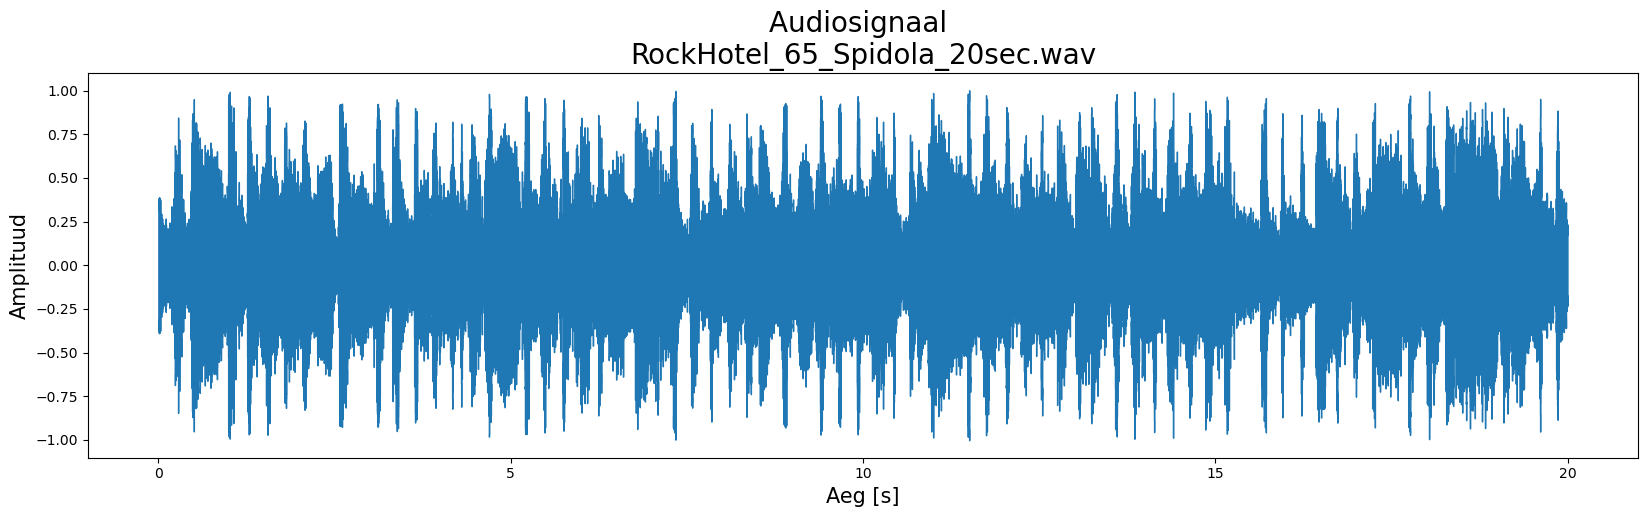

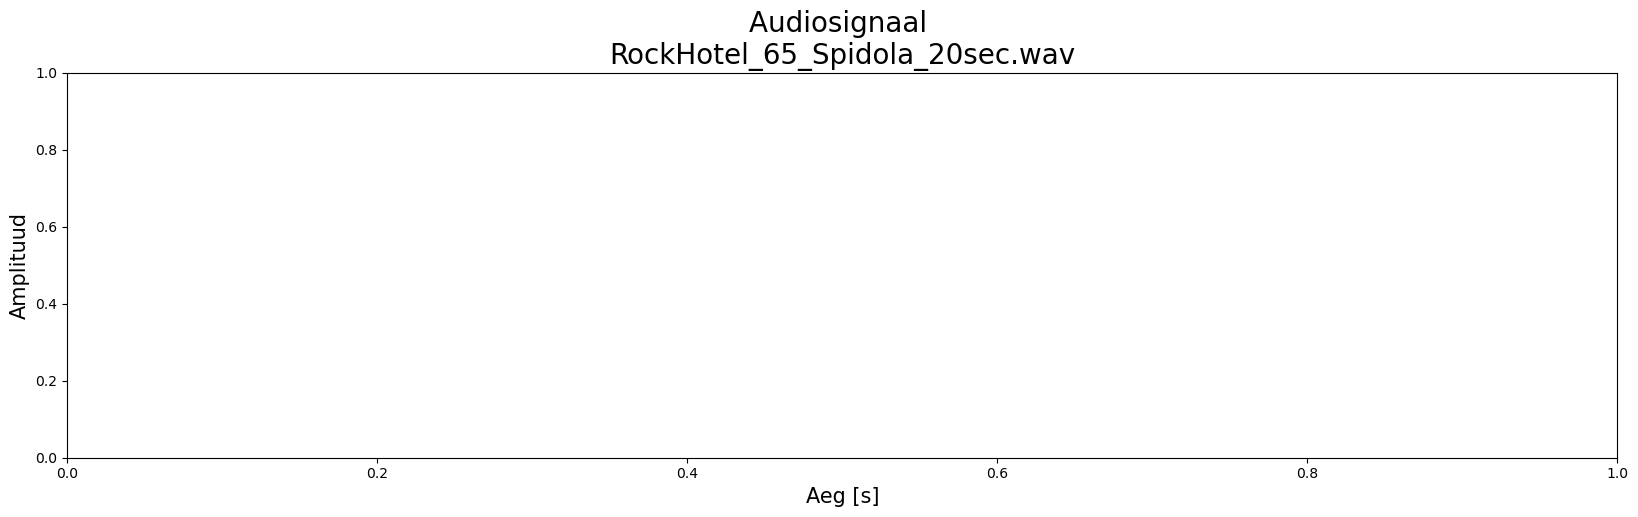

AttributeError: module 'matplotlib' has no attribute 'pyplot'

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

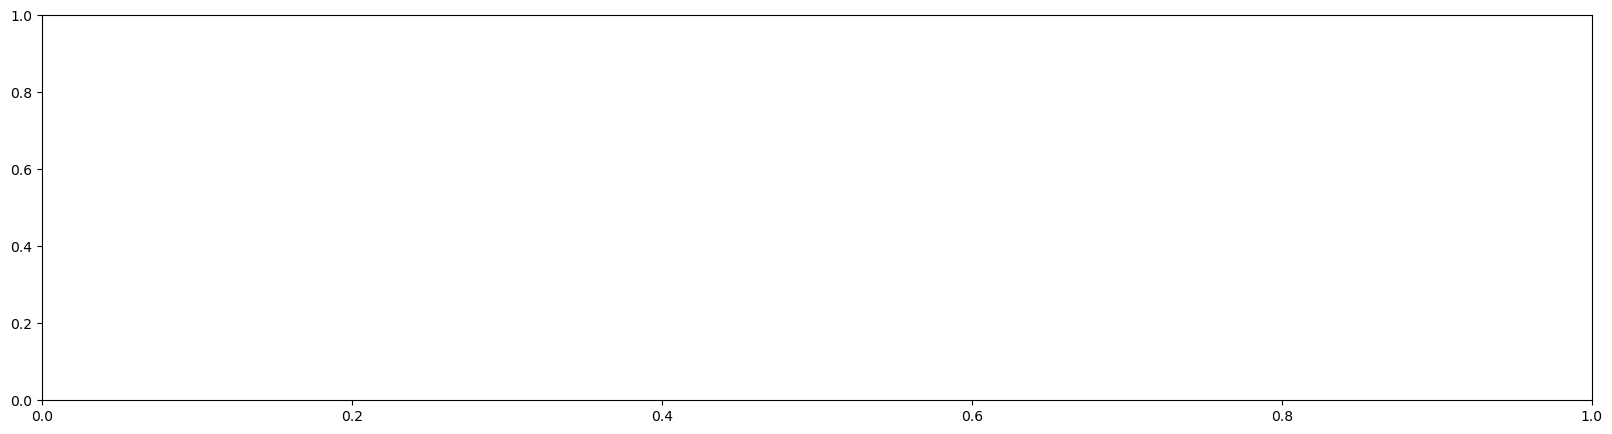

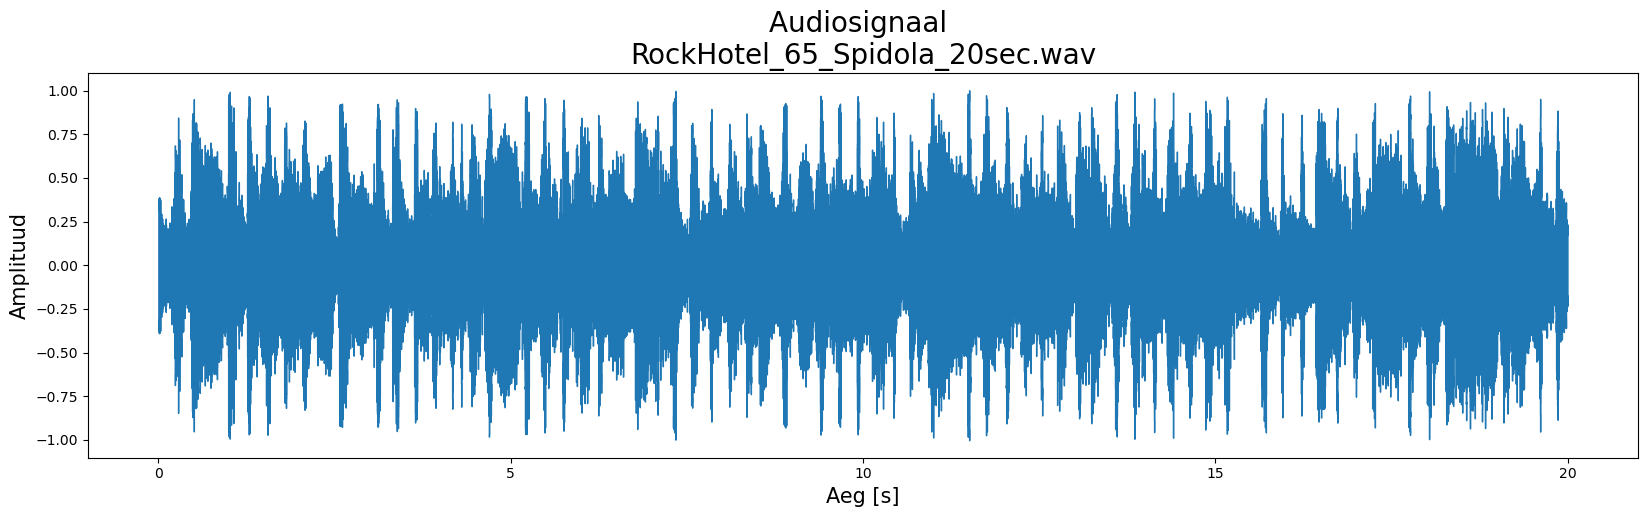

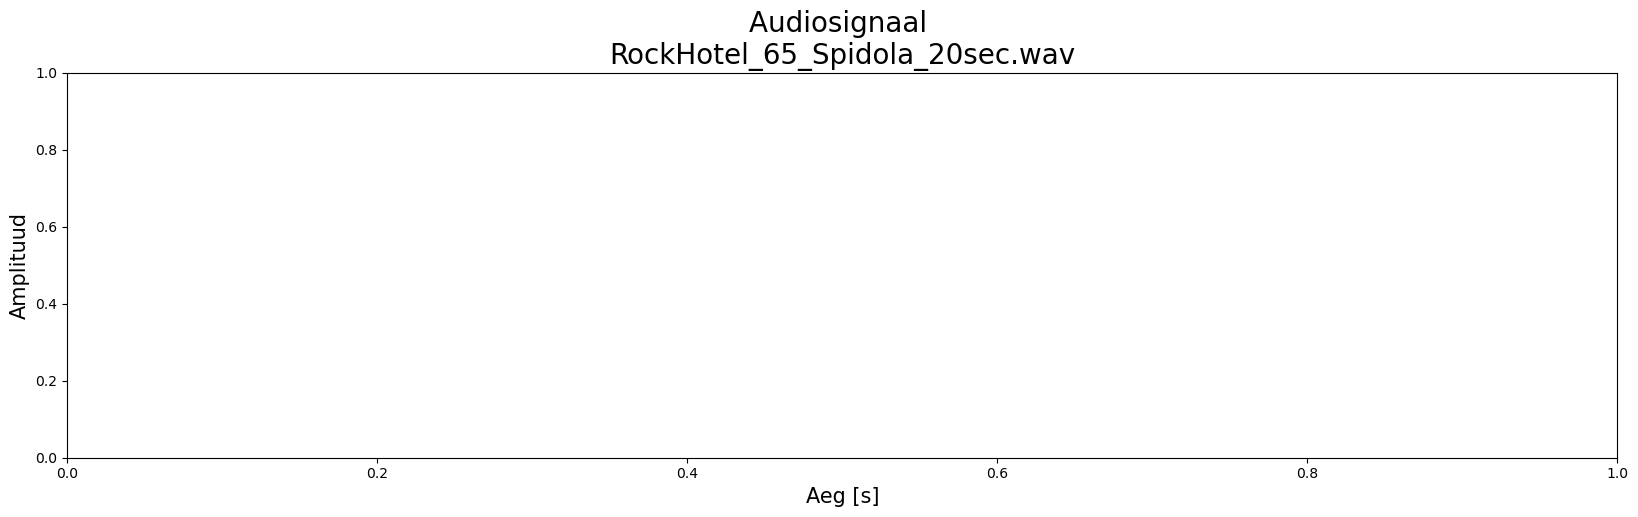

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [9]:
plt.figure(figsize=(20, 5), edgecolor=yellow, facecolor="white")
#librosa.display.waveshow(signal, sr=sr)
plt.title('Audiosignaal \n' + song, fontdict=dict(size=20))
plt.xlabel('Aeg [s]', fontdict=dict(size=15))
plt.ylabel('Amplituud', fontdict=dict(size=15))
plt.savefig(audio + '_signaal.png')
plt.show()

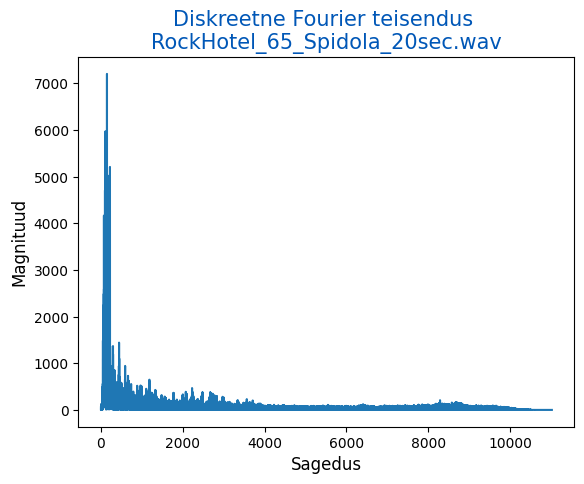

In [67]:
# FFT

# Creating a Discrete-Fourier Transform with our FFT algorithm
fast_fourier_transf = np.fft.fft(signal)
# Magnitudes indicate the contribution of each frequency
magnitude = np.abs(fast_fourier_transf)
# mapping the magnitude to the relative frequency bins
frequency = np.linspace(0, sr, len(magnitude))
# We only need the first half of the magnitude and frequency
left_mag = magnitude[:int(len(magnitude)/2)]
left_freq = frequency[:int(len(frequency)/2)]
plt.plot(left_freq, left_mag)
plt.title('Diskreetne Fourier teisendus \n' + song, fontdict=dict(size=15), color = "#0057b7" )
plt.xlabel('Sagedus', fontdict=dict(size=12))
plt.ylabel('Magnituud', fontdict=dict(size=12))
plt.savefig(audio + '_DFT.png')
plt.show()

# The only issue with a DFT is the fact that it is static — there is no time associated with this plot. So to incorporate time into our audio to see what frequencies impact at what time, we should make a spectrogram.

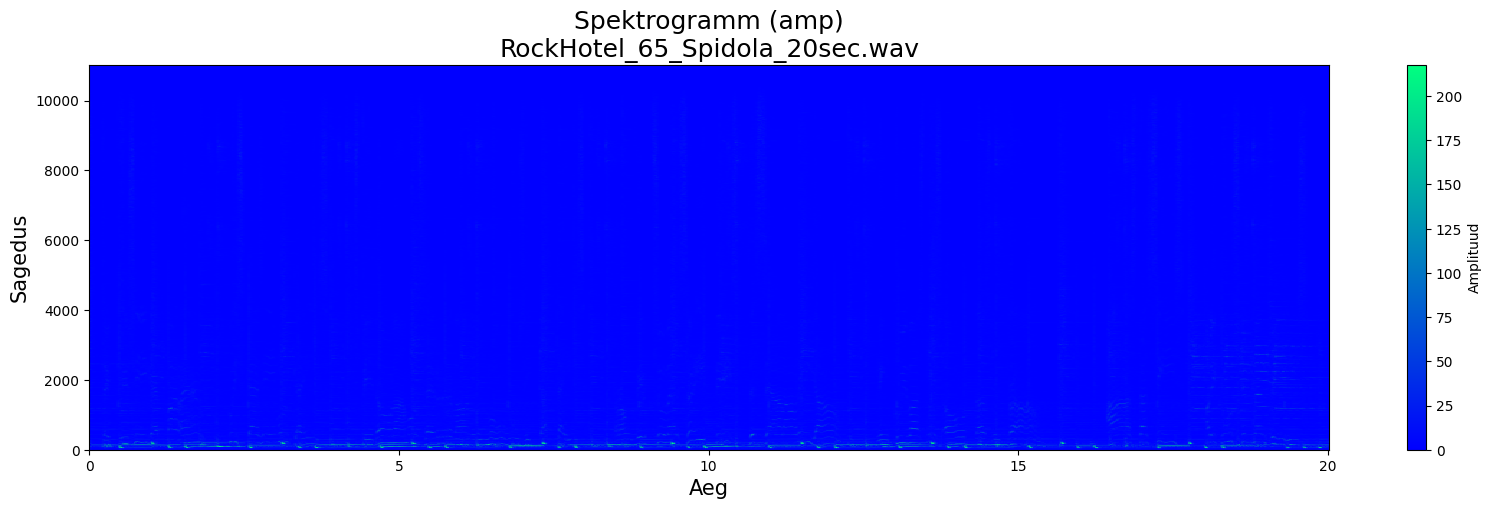

In [68]:
# Short-time Fourier Transformation Algorithm
#To create a spectrogram, we can’t use a Fast-Fourier Transformation on the entire audio at once. Instead of performing an FFT across the entire signal, we will take small segments, or frames, of the audio signal and apply FFTs to each of these frames. This is called a Short-Time Fourier Transformation (STFT). Doing so allows us to preserve information about the time and the way the audio signal evolves. Going further, the frames will overlap each other as we slide across the audio signal. How far the frame slides is determined by the hop length, which tells the function how many sample rates to the right it should slide when we create the next frame. Let’s go ahead and put this into code.

# this is the number of samples in a window per fft
n_fft = 2048
# The amount of samples we are shifting after each fft
hop_length = 512
# Short-time Fourier Transformation on our audio data
audio_stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
# gathering the absolute values for all values in our audio_stft
spectrogram = np.abs(audio_stft)
# Plotting the short-time Fourier Transformation
plt.figure(figsize=(20, 5))
# Using librosa.display.specshow() to create our spectrogram
librosa.display.specshow(spectrogram, sr=sr, x_axis='time',        y_axis='hz', hop_length=hop_length, cmap=cmap)
plt.colorbar(label='Amplituud')
plt.title('Spektrogramm (amp)\n' + song, fontdict=dict(size=18))
plt.xlabel('Aeg', fontdict=dict(size=15))
plt.ylabel('Sagedus', fontdict=dict(size=15))
plt.savefig(audio + '_Spec_amp.png')
plt.show()

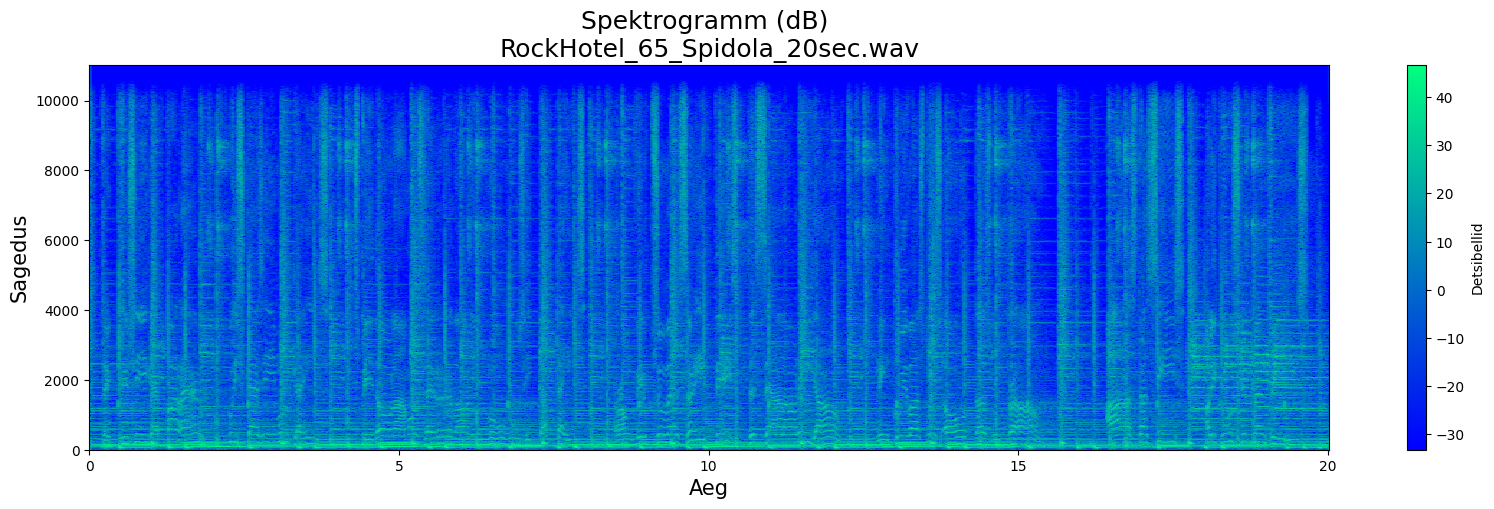

In [69]:
# As we can see (or more accurately, not see), most of these frequencies contribute very little to the overall amplitude of the sound. A way for us to visualize loudness, which is not linear but logarithmic, is to convert our spectrograms from amplitude to decibels.

# Short-time Fourier Transformation on our audio data
audio_stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
# gathering the absolute values for all values in our audio_stft
spectrogram = np.abs(audio_stft)
# Converting the amplitude to decibels
log_spectro = librosa.amplitude_to_db(spectrogram)
# Plotting the short-time Fourier Transformation
plt.figure(figsize=(20, 5))
# Using librosa.display.specshow() to create our spectrogram
librosa.display.specshow(log_spectro, sr=sr, x_axis='time', y_axis='hz', hop_length=hop_length, cmap=cmap)
plt.colorbar(label='Detsibellid')
plt.title('Spektrogramm (dB) \n' + song, fontdict=dict(size=18))
plt.xlabel('Aeg', fontdict=dict(size=15))
plt.ylabel('Sagedus', fontdict=dict(size=15))
plt.savefig(audio + '_SpecDB.png')
plt.show()

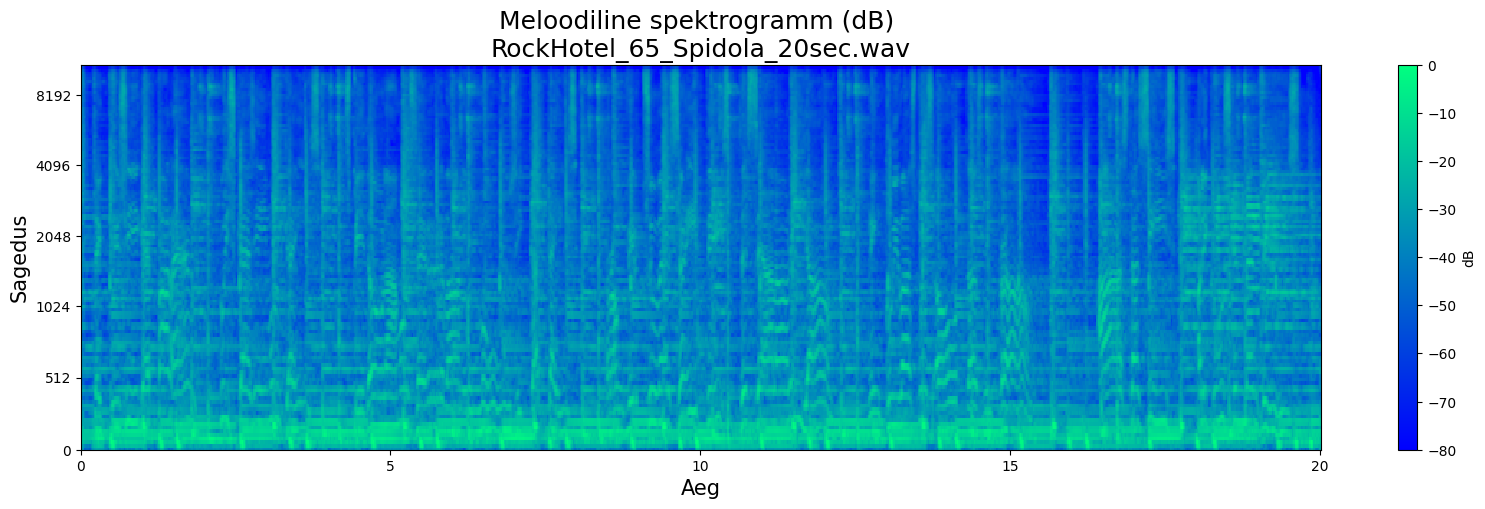

In [71]:
# Creating the Mel-Spectrogram
# The difference between a spectrogram and a Mel-spectrogram is that a Mel-spectrogram converts the frequencies to the mel-scale. According to the University of California, the mel-scale is “a perceptual scale of pitches judged by listeners to be equal in distance from one another”². If you are familiar with playing or reading music, this may help you visualize and understand the conversion and reasoning. Let’s go ahead and picture this as notes on a musical scale:

# From C to D is one whole step, and from D to E is another whole step. Perceptually to the human ears, the step sizes are equal.
# However, if we were to compare these steps in hertz, they would not be equal steps. A C is around 261.626 Hz, a D is 293.665 Hz, and an E is 329.628 Hz.
# C to D difference = 32.03 Hz
# D to E difference = 35.37 Hz
# As the notes go higher in octave, the difference between the steps dramatically increases. Mel-spectrograms provide a perceptually relevant amplitude and frequency representation. Let’s go ahead and plot a Mel-spectrogram.

mel_signal = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=hop_length,
 n_fft=n_fft)
spectrogram = np.abs(mel_signal)
power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(20, 5))
librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel', cmap=cmap,
 hop_length=hop_length)
plt.colorbar(label='dB')
plt.title('Meloodiline spektrogramm (dB) \n' + song, fontdict=dict(size=18))
plt.xlabel('Aeg', fontdict=dict(size=15))
plt.ylabel('Sagedus', fontdict=dict(size=15))

plt.savefig(audio + '_Mel.png')
plt.show()

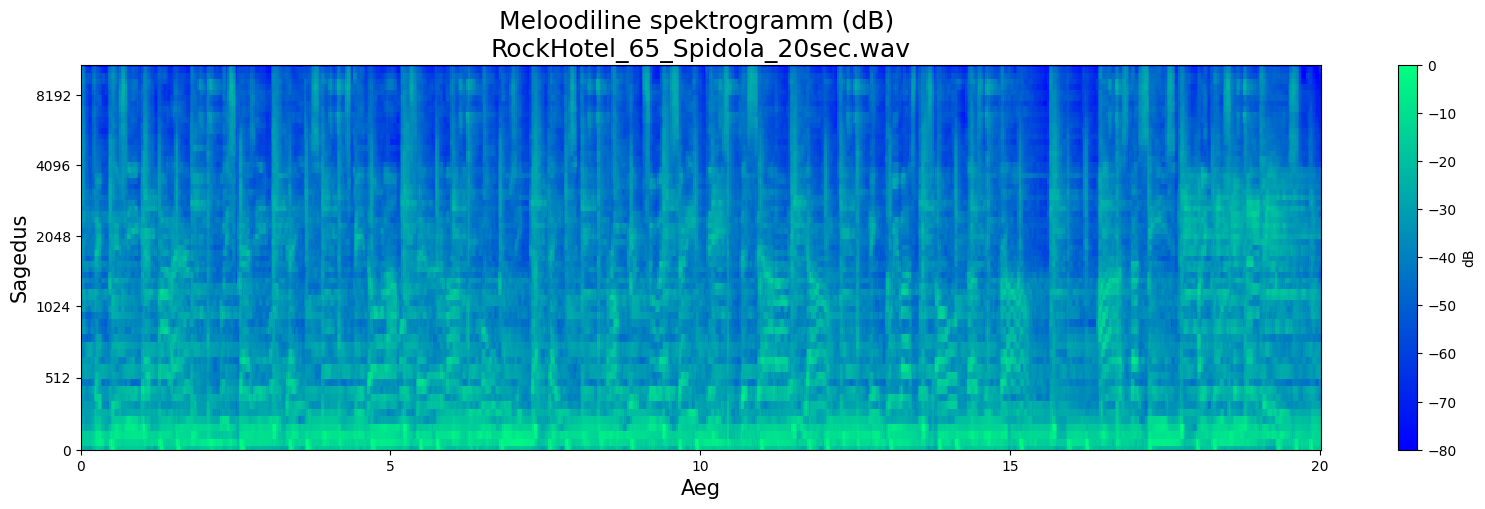

In [74]:
# Mel_spectrum image Mel2 64
mel_spec = librosa.feature.melspectrogram(y=signal,sr=sr,n_mels=64)
plt.figure(figsize=(20, 5))
mel_spec_db = librosa.power_to_db(mel_spec,ref=np.max)
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', cmap=cmap,
 hop_length=hop_length)

plt.colorbar(label='dB')
plt.title('Meloodiline spektrogramm (dB) \n' + song, fontdict=dict(size=18))
plt.xlabel('Aeg', fontdict=dict(size=15))
plt.ylabel('Sagedus', fontdict=dict(size=15))


plt.savefig(audio + '_Mel_2.png')
plt.show()

“Librosa — Librosa 0.8.0 Documentation.” Librosa, librosa.org/doc/latest/index.html. Accessed 7 Apr. 2021.
Smyth, Tamara. “The Mel Scale.” University of California, San Diego, Tamara Smyth, 4 June 2019, musicweb.ucsd.edu/~trsmyth/pitch2/Mel_Scale.html.

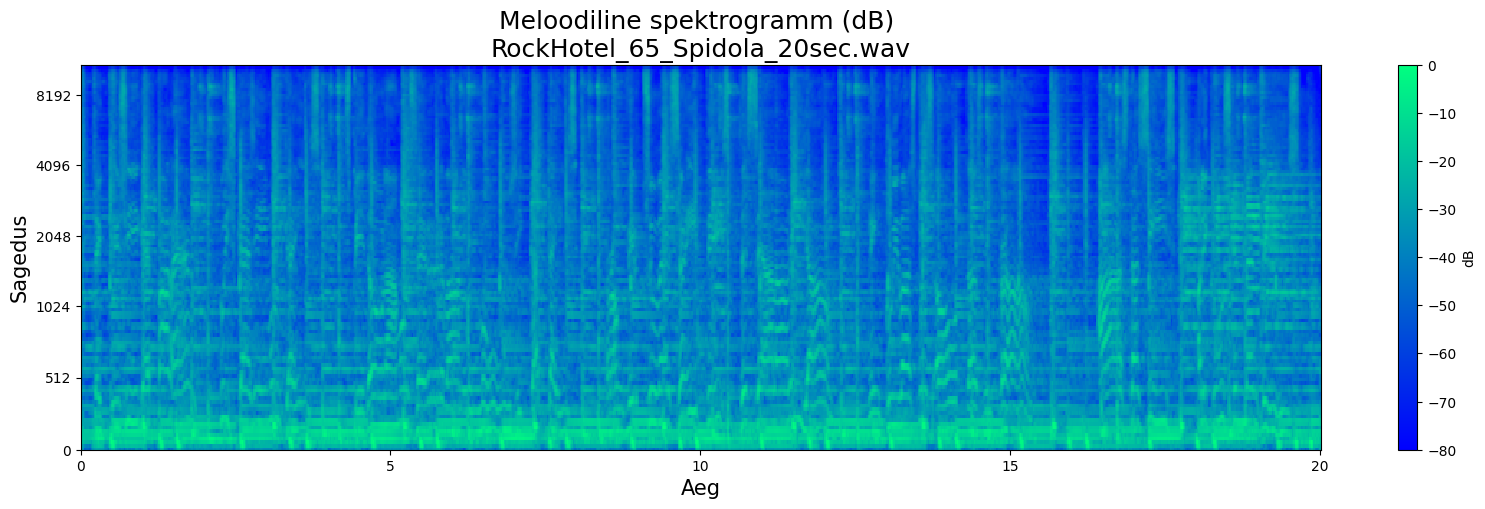

In [75]:
# Mel_spectrum image Mel 3 128
mel_spec = librosa.feature.melspectrogram(y=signal,sr=sr,n_mels=128)
plt.figure(figsize=(20, 5))
mel_spec_db = librosa.power_to_db(mel_spec,ref=np.max)
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', cmap=cmap,
 hop_length=hop_length)

plt.colorbar(label='dB')
plt.title('Meloodiline spektrogramm (dB) \n' + song, fontdict=dict(size=18))
plt.xlabel('Aeg', fontdict=dict(size=15))
plt.ylabel('Sagedus', fontdict=dict(size=15))


plt.savefig(audio + '_Mel_3.png')
plt.show()